In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("./MLC_SP23/clean_data/merged_data.csv", low_memory=False, index_col=[0])

In [9]:
#listing acs columns to drop

drop_acs_list = ['hh_inc_med_19', 'own_burden_med_19', 'own_burden_nomort_med_19', 
                'pop_u18_pct_19', 'pop_18_64_pct_19', 'pop_fam_pct_19', 'pop_nonfam_pct_19', 
                'pop_gq_pct_19', 'pop_alone_pct_19', 'hh_other_nonfam_pct_19', 'pop_edu_nohs_pct_19',
                'pop_edu_somecoll_pct_19', 'pop_edu_coll_pct_19', 'pop_edu_grad_pct_19',
                 'pop_mobile1_same_state_pct_19', 'hh_inc_earn_pct_19', 'unit_occ_pct_19',
                 'unit_occ_rent_nochild_pct_19', 'unit_rent_cash_low_pct_19', 'unit_rent_cash_moderate_pct_19',
                'hh_inc_rent_med_19', 'own_cost_nomort_med_19', 'rent_gross_med_19', 'pop_own_pct_19',
                'hh_inc_self_emp_pct_19', 'hh_inc_int_div_pct_19', 'hh_inc_soc_sec_pct_19', 'hh_inc_pubasst_pct_19', 
                'hh_inc_other_pct_19', 'unit_occ_own_pct_19', 'unit_occ_rent_pct_19', 'unit_occ_rent_sevcrowd_pct_19',
                'unit_rent_cash_pct_19', 'rent_burden_mod_pct_19', 'rent_burden_sev_pct_19', 'cd_x', 'cd_y', 'ct_10', 
                 'tract_19']

#keep only columns not in drop_acs_list
df = df[df.columns[~df.columns.isin(drop_acs_list)]]

#create boro dummies
df = pd.get_dummies(df, columns = ['boro'], drop_first = True)

In [10]:
df.head()

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,unit_occ_rent_crowd_pct_19,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,boro_2,boro_3,boro_4,boro_5
0,1000780047,0.0000,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125601,0.102265,0.020522,0.083478,0.326156,0.450691,0,0,0,0
1,1001350019,0.0000,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.048620,0.160315,0.004743,0.000000,0.241661,0.457072,0,0,0,0
2,1001620013,-0.0500,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0
3,1001630024,0.1875,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0
4,1001630033,0.0000,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,...,0.164841,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0


In [11]:
# Convert the target var from continuous to binary

df.loc[df['rs_share_diff'] < 0, 'rs_share_diff_new'] = 1
df.loc[df['rs_share_diff'] >= 0, 'rs_share_diff_new'] = 0

In [12]:
df = df.drop(['rs_share_diff'], axis=1)

In [13]:
df.loc[df['rs_share_diff_new'] == 0]

,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,boro_2,boro_3,boro_4,boro_5,rs_share_diff_new
0,1000780047,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.102265,0.020522,0.083478,0.326156,0.450691,0,0,0,0,0.0
1,1001350019,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160315,0.004743,0.000000,0.241661,0.457072,0,0,0,0,0.0
3,1001630024,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0,0.0
4,1001630033,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0,0.0
5,1001640049,19,1915,0.0,0.0,0.0,1.0,1.0,0.0,-3.0,...,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,4001360036,7,1924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.229865,0.461259,0.161017,0.523723,0.678053,0,0,1,0,0.0
38963,4019390011,68,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.297458,0.309322,0.075424,0.643301,0.374426,0,0,1,0,0.0
38964,4049590008,7,1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.263339,0.360507,0.221014,0.771037,0.162352,0,0,1,0,0.0
38965,4052630021,47,1929,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.359606,0.390244,0.113821,0.602273,0.651452,0,0,1,0,0.0


In [14]:
df.loc[df['rs_share_diff_new'] == 1]

,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,unit_occ_rent_child_pct_19,unit_rent_cash_mod_high_pct_19,unit_rent_cash_high_pct_19,rent_burden_pct_19,pop_race_div_idx_19,boro_2,boro_3,boro_4,boro_5,rs_share_diff_new
2,1001620013,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.143924,0.079300,0.118950,0.701854,0.612518,0,0,0,0,1.0
11,1002050023,22,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115264,0.076215,0.094951,0.379087,0.555189,0,0,0,0,1.0
13,1002350005,6,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115264,0.076215,0.094951,0.379087,0.555189,0,0,0,0,1.0
14,1002360026,21,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115264,0.076215,0.094951,0.379087,0.555189,0,0,0,0,1.0
15,1002370011,15,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115264,0.076215,0.094951,0.379087,0.555189,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37769,5042120047,14,1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.273305,0.277136,0.161663,0.408521,0.341175,0,0,0,1,1.0
37771,5046330283,20,1977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.143617,0.255556,0.188889,0.322222,0.190448,0,0,0,1,1.0
37774,5046570021,12,1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296000,0.380000,0.036000,0.504000,0.298333,0,0,0,1,1.0
37778,5050160005,65,1976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296000,0.380000,0.036000,0.504000,0.298333,0,0,0,1,1.0


In [15]:
df['hpd_call_2017_19'] = df['hpd_calls_2017'] + df['hpd_calls_2018'] + df['hpd_calls_2019']
df['hpd_call_2017_19']

0         4.0
1         0.0
2         2.0
3         1.0
4         0.0
         ... 
38962     0.0
38963     1.0
38964     0.0
38965    48.0
38966    18.0
Name: hpd_call_2017_19, Length: 38967, dtype: float64

In [16]:
df = df.drop(['hpd_calls_2017','hpd_calls_2018','hpd_calls_2019'], axis=1)

In [17]:
# log transformation of skewed var that aren't dropped
log_cols = ['hh_inc_avg_19','pop_race_asian_pct_19','pop_race_black_pct_19','pop16_unemp_pct_19','pop_mobile1_diff_state_pct_19']
for col in log_cols:
    col_name = '{}_log1'.format(col)
    df[col_name] = np.log1p(df[col])
    df = df.drop(col, axis=1)


In [18]:
len(df.columns.to_list())

75

IndexError: list index out of range

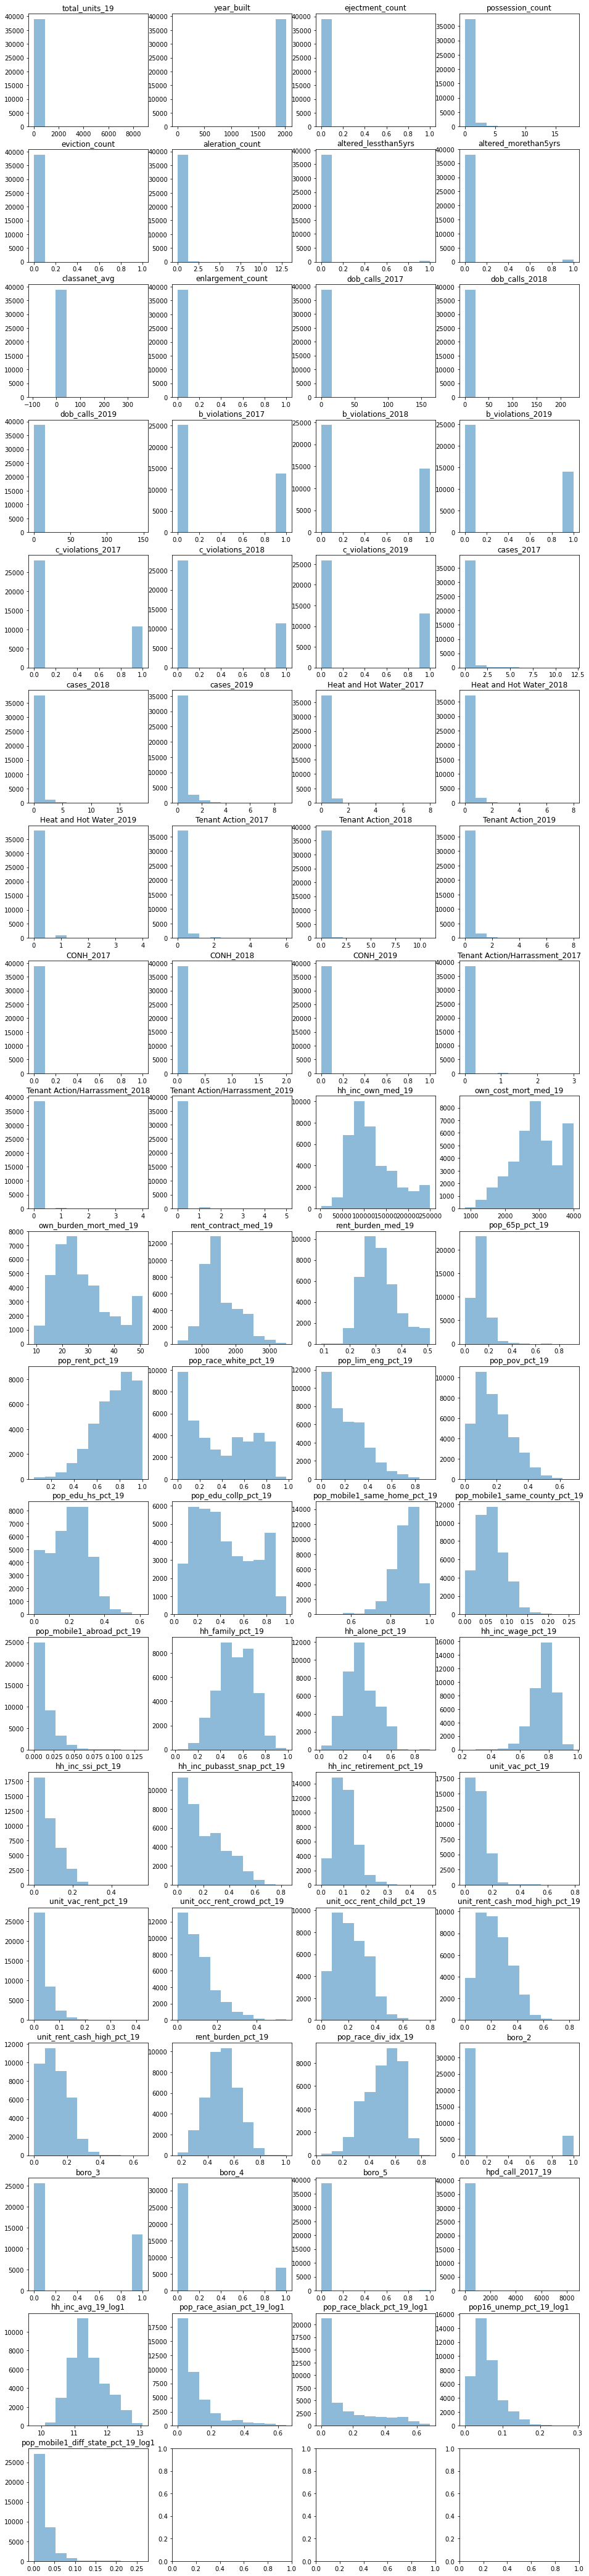

In [19]:
# New Histogram
import matplotlib
import matplotlib.pyplot as plt

features = df.columns.to_list()
features.remove('bbl')
features.remove('rs_share_diff_new')

rows=19
cols=4
fig, axes = plt.subplots(figsize=(cols*4, rows*4), ncols=cols, nrows=rows)

for i, row in enumerate(axes):
    for j, axe in enumerate(row):
        my_col = features[i*cols + j]
        my_data = df[my_col]
        axe.hist(my_data, alpha=0.5)
        axe.set_title(my_col)

In [20]:
df.head()

,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,boro_3,boro_4,boro_5,rs_share_diff_new,hpd_call_2017_19,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,4.0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1.0,2.0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,1.0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0.0,0.0,10.973689,0.461379,0.096629,0.037102,0.008935


In [22]:
df.to_csv('./MLC_SP23/clean_data/merged_data_v3.csv')